In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import string
import re


In [2]:
data = pd.read_csv('/kaggle/input/medium-articles-dataset/medium_data.csv')
data.sample(10)

,id,url,title,subtitle,claps,responses,reading_time,publication,date
609,610,https://towardsdatascience.com/storytelling-wi...,Storytelling with Charts,Part 1: Displaying a single quantitative variable,8.0,0,8,Towards Data Science,10-02-2023
1650,1651,https://towardsdatascience.com/effective-data-...,Effective Data Visualization: 9 Valuable Tips ...,NaN,143.0,0,10,Towards Data Science,13-03-2023
936,937,https://towardsdatascience.com/how-to-deploy-a...,How To Deploy and Test Your Models Using FastA...,Learn how to turn your model…,31.0,2,12,Towards Data Science,08-03-2023
1392,1393,https://medium.com/swlh/five-simple-ways-to-dr...,Five Simple Ways to Drastically Boost Your Energy,Workers are tired — and they care about their…,636.0,16,6,The Startup,10-01-2023
1344,1345,https://uxdesign.cc/using-ai-in-ux-research-a-...,Using AI in UX research: a structured and ethi...,A structured approach for assessing the…,110.0,0,6,UX Collective,11-03-2023
1068,1069,https://writingcooperative.com/how-to-create-a...,How to Create a Content Writing Strategy You C...,Answer these 4 questions and you’re on…,455.0,8,9,The Writing Cooperative,23-01-2023
1028,1029,https://medium.com/swlh/how-to-write-a-winning...,How to Write a Winning Article That Attracts R...,Here is what you need to do to write a winning...,1400.0,27,10,The Startup,18-03-2023
1076,1077,https://towardsdatascience.com/thread-summariz...,"<strong class=""markup--strong markup--h3-stron...","Extractive summarization using POS tagging, NE...",44.0,1,13,Towards Data Science,07-01-2023
1222,1223,https://towardsdatascience.com/how-to-properly...,How to Properly Deploy ML Models as Flask APIs...,Deploy XGBoost models on Amazon ECS to…,97.0,2,8,Towards Data Science,16-03-2023
2232,2233,https://towardsdatascience.com/prediction-perf...,Prediction Performance Drift: The Other Side o...,"We know the causes, let’s talk about the…",22.0,1,7,Towards Data Science,02-02-2023


In [3]:
data.isna().sum()

id                0
url               0
title             0
subtitle        425
claps            75
responses         0
reading_time      0
publication       0
date              0
dtype: int64

In [4]:
df = data[['title']]
df = df.dropna().reset_index(drop = True)
df.head()

,title
0,Not All Rainbows and Sunshine: The Darker Side...
1,Ethics in AI: Potential Root Causes for Biased...
2,"Python Tuple, The Whole Truth and Only the Tru..."
3,Dates and Subqueries in SQL
4,Temporal Differences with Python: First Sample...


In [5]:
df['title'][123]

'PCA/LDA/ICA\xa0: a components analysis algorithms comparison'

In [6]:
df.shape

(2498, 1)

In [7]:
def clean_text(df):
    df['title'] = df['title'].apply(lambda x : x.lower())
    tokens = df['title'].str.replace('[{}]'.format(string.punctuation), '')
    return tokens

In [8]:
tokens = clean_text(df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
tokens

0       not all rainbows and sunshine the darker side ...
1       ethics in ai potential root causes for biased ...
2       python tuple the whole truth and only the trut...
3                             dates and subqueries in sql
4       temporal differences with python first sampleb...
                              ...                        
2493    brian chesky is an example of what it means to...
2494                 5 red flags of online business gurus
2495    recognizing these three realities can help set...
2496    “i remember it like it was just yesterday…” re...
2497            how to formulate a great nonfiction theme
Name: title, Length: 2498, dtype: object

In [10]:
len(set(tokens))

1848

# Tokenizing

In [11]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(tokens)
seq = tokenizer.texts_to_sequences(tokens)

In [12]:
seq[:10]

[[59, 86, 1204, 8, 1205, 2, 1206, 175, 670],
 [533, 7, 21, 295, 872, 1207, 6, 1208, 264],
 [31, 873, 2, 671, 335, 8, 158, 2, 335, 296, 1209],
 [442, 8, 1210, 534],
 [874, 1211, 10, 31, 79, 1212, 127, 17, 176],
 [297, 535, 2, 1213, 5, 1214, 1215, 3, 1216, 377, 34],
 [45, 1217, 86, 49, 1218, 672, 75, 119, 12, 1219],
 [111, 875, 193, 13, 236, 13, 237, 54, 13, 336, 1220, 238, 337, 8, 120, 1221],
 [4, 1, 92, 3, 265, 536, 7, 535, 40, 537, 10, 443],
 [93, 94, 3, 194, 76, 239, 62, 12, 99, 1222, 1223]]

# Creating input and output data list

In [13]:
x = []
y = []
total_words_drop = 0
for i in seq:
    if len(i) > 1:
        for j in range(1, len(i)):
            x.append(i[:j])
            y.append(i[j])
            
    else : 
        total_words_drop +=1
print('Total Words Dropped : {}'.format(total_words_drop))

Total Words Dropped : 2


In [14]:
y[: 10]

[86, 1204, 8, 1205, 2, 1206, 175, 670, 7, 21]

# Padding sequences

In [15]:
x = tf.keras.preprocessing.sequence.pad_sequences(x)

In [16]:
x.shape

(18311, 21)

# Shaping y same as x

In [17]:
y = tf.keras.utils.to_categorical(y)

In [18]:
y.shape

(18311, 4642)

# Vocab Size : total no. of unique words

In [19]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

4642

# LSTM Model

In [48]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,49 ),
                            tf.keras.layers.LSTM(100, return_sequences = True),
                            tf.keras.layers.LSTM(100),
                            tf.keras.layers.Dense(100, activation = 'relu'),
                            tf.keras.layers.Dense(vocab_size, activation = 'softmax')])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 49)          227458    
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 100)         60000     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 4642)              468842    
Total params: 846,800
Trainable params: 846,800
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [27]:
history = model.fit(x,y,
                   epochs = 50,
                    batch_size = 64,
                    callbacks = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                               patience = 5,
                                                               restore_best_weights = True))

Epoch 1/50
287/287 [==============================] - 18s 63ms/step - loss: 4.4682 - accuracy: 0.1301
Epoch 2/50
287/287 [==============================] - 17s 60ms/step - loss: 4.2956 - accuracy: 0.1464
Epoch 3/50
287/287 [==============================] - 18s 63ms/step - loss: 4.1356 - accuracy: 0.1546
Epoch 4/50
287/287 [==============================] - 17s 59ms/step - loss: 4.0165 - accuracy: 0.1647
Epoch 5/50
287/287 [==============================] - 18s 62ms/step - loss: 3.9193 - accuracy: 0.1766
Epoch 6/50
287/287 [==============================] - 18s 63ms/step - loss: 3.8340 - accuracy: 0.1849
Epoch 7/50
287/287 [==============================] - 17s 59ms/step - loss: 3.7518 - accuracy: 0.1954
Epoch 8/50
287/287 [==============================] - 18s 64ms/step - loss: 3.6684 - accuracy: 0.2048
Epoch 9/50
287/287 [==============================] - 17s 60ms/step - loss: 3.5980 - accuracy: 0.2122
Epoch 10/50
287/287 [==============================] - 18s 63ms/step - loss: 3.521

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history[metric], label='Training ' + metric)
    if 'val_' + metric in history.history:
        plt.plot(history.history['val_' + metric], label='Validation ' + metric)
    plt.title('Training and Validation ' + metric.capitalize())
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming 'history' is your Keras history object from a model's training process
# plot_graphs(history, 'accuracy')


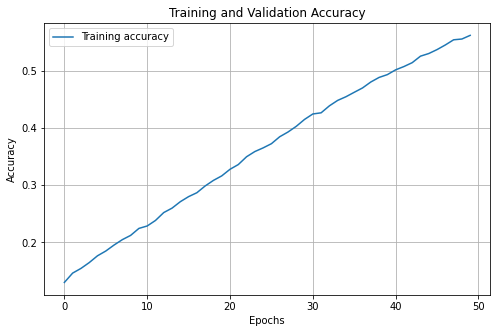

In [32]:
plot_graphs(history,'accuracy')

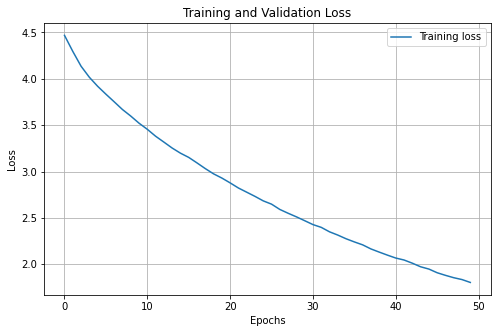

In [33]:
plot_graphs(history,'loss')

# Saving model

In [34]:
model.save('model.h5')

# Vocab Array : list of all the unique words

In [35]:
vocab_array = np.array(list(tokenizer.word_index.keys()))
vocab_array

array(['to', 'the', 'a', ..., 'yesterday…”', 'formulate', 'theme'],
      dtype='<U77')

# Final Function for Predictions

In [36]:
def make_predictions(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padding  = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen = 49)
        prediction = np.squeeze(np.argmax(model.predict(text_padding), axis = -1))
        prediction = str(vocab_array[prediction - 1])
        text += " " + prediction
    return text

# Testing Model

In [37]:
make_predictions('california',5)

'california with\xa0optuna polars’ tests for fantasy'

In [38]:
make_predictions('new york',8)

'new york machine learning models that i components in\xa0protopie winning'

In [39]:
make_predictions('highway',8)

'highway with\xa0optuna polars’ tests for fantasy world\xa0building a fullfunnel'

# BILSTM Model

In [20]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 49),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(4642, activation='softmax')  # Updated number of classes
])

In [21]:
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 49)          227458    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 200)         120000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               240800    
_________________________________________________________________
dense (Dense)                (None, 100)               20100     
_________________________________________________________________
dense_1 (Dense)              (None, 4642)              468842    
Total params: 1,077,200
Trainable params: 1,077,200
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [25]:
history2 = model2.fit(
    x, y,  # Make sure 'y' is properly encoded if needed
    epochs=50,
    batch_size=50,
    validation_split=0.2  # Using 20% of data for validation
)


Epoch 1/50
293/293 [==============================] - 3s 11ms/step - loss: 2.0313 - accuracy: 0.5033 - val_loss: 9.9612 - val_accuracy: 0.3445
Epoch 2/50
293/293 [==============================] - 3s 11ms/step - loss: 2.0645 - accuracy: 0.4924 - val_loss: 9.9696 - val_accuracy: 0.3464
Epoch 3/50
293/293 [==============================] - 3s 11ms/step - loss: 1.9465 - accuracy: 0.5248 - val_loss: 10.0840 - val_accuracy: 0.3639
Epoch 4/50
293/293 [==============================] - 3s 11ms/step - loss: 1.8889 - accuracy: 0.5335 - val_loss: 10.0697 - val_accuracy: 0.3688
Epoch 5/50
293/293 [==============================] - 3s 11ms/step - loss: 1.8102 - accuracy: 0.5573 - val_loss: 10.0419 - val_accuracy: 0.3787
Epoch 6/50
293/293 [==============================] - 3s 11ms/step - loss: 1.7645 - accuracy: 0.5727 - val_loss: 10.1820 - val_accuracy: 0.3877
Epoch 7/50
293/293 [==============================] - 3s 11ms/step - loss: 1.7249 - accuracy: 0.5783 - val_loss: 10.2863 - val_accuracy: 0

In [26]:
history2 = model2.fit(
    x, y,  # Make sure 'y' is properly encoded if needed
    epochs=50,
    batch_size=64,
    validation_split=0.2  # Using 20% of data for validation
)

Epoch 1/50
229/229 [==============================] - 3s 12ms/step - loss: 0.6670 - accuracy: 0.8352 - val_loss: 12.7119 - val_accuracy: 0.5725
Epoch 2/50
229/229 [==============================] - 3s 11ms/step - loss: 0.6148 - accuracy: 0.8512 - val_loss: 12.7106 - val_accuracy: 0.5717
Epoch 3/50
229/229 [==============================] - 3s 12ms/step - loss: 0.5952 - accuracy: 0.8555 - val_loss: 12.8263 - val_accuracy: 0.5782
Epoch 4/50
229/229 [==============================] - 3s 11ms/step - loss: 0.5924 - accuracy: 0.8569 - val_loss: 12.8710 - val_accuracy: 0.5779
Epoch 5/50
229/229 [==============================] - 3s 11ms/step - loss: 0.5971 - accuracy: 0.8560 - val_loss: 12.9865 - val_accuracy: 0.5711
Epoch 6/50
229/229 [==============================] - 3s 11ms/step - loss: 0.5906 - accuracy: 0.8545 - val_loss: 13.0140 - val_accuracy: 0.5689
Epoch 7/50
229/229 [==============================] - 3s 11ms/step - loss: 0.6036 - accuracy: 0.8495 - val_loss: 13.1036 - val_accuracy:

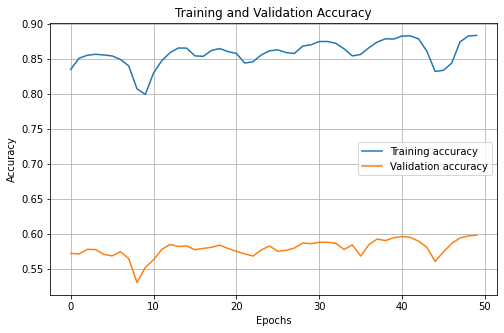

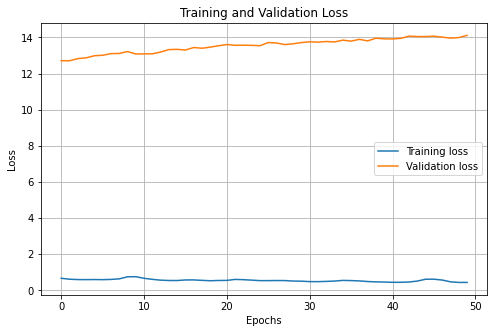

In [30]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.figure(figsize=(8, 5))
    plt.plot(history2.history[metric], label='Training ' + metric)
    if 'val_' + metric in history2.history:
        plt.plot(history2.history['val_' + metric], label='Validation ' + metric)
    plt.title('Training and Validation ' + metric.capitalize())
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

plot_graphs(history2, 'accuracy')
plot_graphs(history2,'loss')

In [32]:
model2.save('model2.h5')

In [33]:
vocab_array = np.array(list(tokenizer.word_index.keys()))
vocab_array

array(['to', 'the', 'a', ..., 'yesterday…”', 'formulate', 'theme'],
      dtype='<U77')

# Final function for prediction

In [36]:
def make_predictions(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padding  = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen = 49)
        prediction = np.squeeze(np.argmax(model2.predict(text_padding), axis = -1))
        prediction = str(vocab_array[prediction - 1])
        text += " " + prediction
    return text


# Testing model

In [37]:
make_predictions('california',5)

'california is it pronounced as in'

In [38]:
make_predictions('new york',8)

'new york scikitlearn is to planning an\xa0offsite techniques for math'

In [39]:
make_predictions('highway',8)

'highway is it pronounced as in scratch in r'

# RNN

In [22]:
model3 = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size,49 ),
                            tf.keras.layers.SimpleRNN(100, return_sequences = True),
                            tf.keras.layers.SimpleRNN(100),
                            tf.keras.layers.Dense(100, activation = 'relu'),
                            tf.keras.layers.Dense(vocab_size, activation = 'softmax')])

In [23]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 49)          227458    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 100)         15000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 4642)              468842    
Total params: 741,500
Trainable params: 741,500
Non-trainable params: 0
_________________________________________________________________


In [24]:
model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [25]:
history3 = model3.fit(
    x, y,  # Make sure 'y' is properly encoded if needed
    epochs=50,
    batch_size=64,
    validation_split=0.2  # Using 20% of data for validation
)

Epoch 1/50
229/229 [==============================] - 12s 41ms/step - loss: 7.4458 - accuracy: 0.0437 - val_loss: 7.1839 - val_accuracy: 0.0434
Epoch 2/50
229/229 [==============================] - 9s 38ms/step - loss: 6.9914 - accuracy: 0.0450 - val_loss: 7.1239 - val_accuracy: 0.0472
Epoch 3/50
229/229 [==============================] - 9s 38ms/step - loss: 6.6997 - accuracy: 0.0560 - val_loss: 6.9559 - val_accuracy: 0.0494
Epoch 4/50
229/229 [==============================] - 9s 39ms/step - loss: 6.3950 - accuracy: 0.0679 - val_loss: 6.8332 - val_accuracy: 0.0718
Epoch 5/50
229/229 [==============================] - 9s 38ms/step - loss: 6.0945 - accuracy: 0.0809 - val_loss: 6.8030 - val_accuracy: 0.0794
Epoch 6/50
229/229 [==============================] - 9s 38ms/step - loss: 5.8106 - accuracy: 0.0940 - val_loss: 6.7681 - val_accuracy: 0.0846
Epoch 7/50
229/229 [==============================] - 9s 39ms/step - loss: 5.5257 - accuracy: 0.1068 - val_loss: 6.8278 - val_accuracy: 0.088

In [28]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.figure(figsize=(8, 5))
    plt.plot(history3.history[metric], label='Training ' + metric)
    if 'val_' + metric in history3.history:
        plt.plot(history3.history['val_' + metric], label='Validation ' + metric)
    plt.title('Training and Validation ' + metric.capitalize())
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

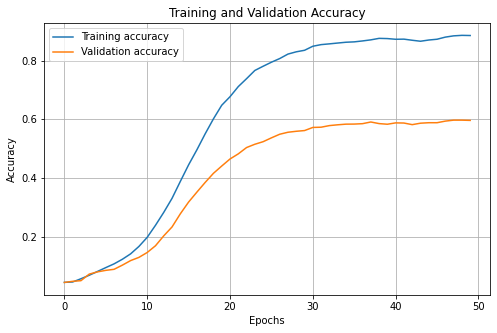

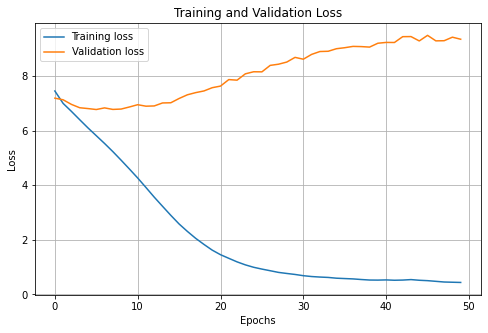

In [31]:
plot_graphs(history3, 'accuracy')

plot_graphs(history3,'loss')

In [33]:
model3.save('model3.h5')

# Final function for prediction

In [37]:
vocab_array = np.array(list(tokenizer.word_index.keys()))
vocab_array

array(['to', 'the', 'a', ..., 'yesterday…”', 'formulate', 'theme'],
      dtype='<U77')

In [38]:
def make_predictions(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padding  = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen = 49)
        prediction = np.squeeze(np.argmax(model3.predict(text_padding), axis = -1))
        prediction = str(vocab_array[prediction - 1])
        text += " " + prediction
    return text

In [39]:
make_predictions('california',5)

'california the power of urgency real'

In [40]:
make_predictions('new york',8)

'new york linkedin updates you will\xa0love getting your first science'

In [42]:
make_predictions('highway',8)

'highway the power of urgency real campaigns that convinced'